In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import util

In [15]:
img = cv2.imread('sar_1.jpg', cv2.IMREAD_GRAYSCALE)

In [16]:
gn = np.random.normal(0, 25, img.shape).astype(np.uint8)
img_gn = cv2.add(img, gn)

In [17]:
spn = np.random.randint(0, 2, size=img.shape).astype(np.uint8) * 255
img_sp = cv2.add(img, spn)

In [18]:
mf_gn = cv2.medianBlur(img_gn, 5)
mf_sp = cv2.medianBlur(img_sp, 5)

In [19]:
gf_gn = cv2.GaussianBlur(img_gn, (5, 5), 0)
gf_sp = cv2.GaussianBlur(img_sp, (5, 5), 0)

In [20]:
bf_gn = cv2.bilateralFilter(img_gn, 9, 75, 75)
bf_sp = cv2.bilateralFilter(img_sp, 9, 75, 75)

In [21]:
nlm_gn = cv2.fastNlMeansDenoising(img_gn, None, 10, 7, 21)
nlm_sp = cv2.fastNlMeansDenoising(img_sp, None, 10, 7, 21)

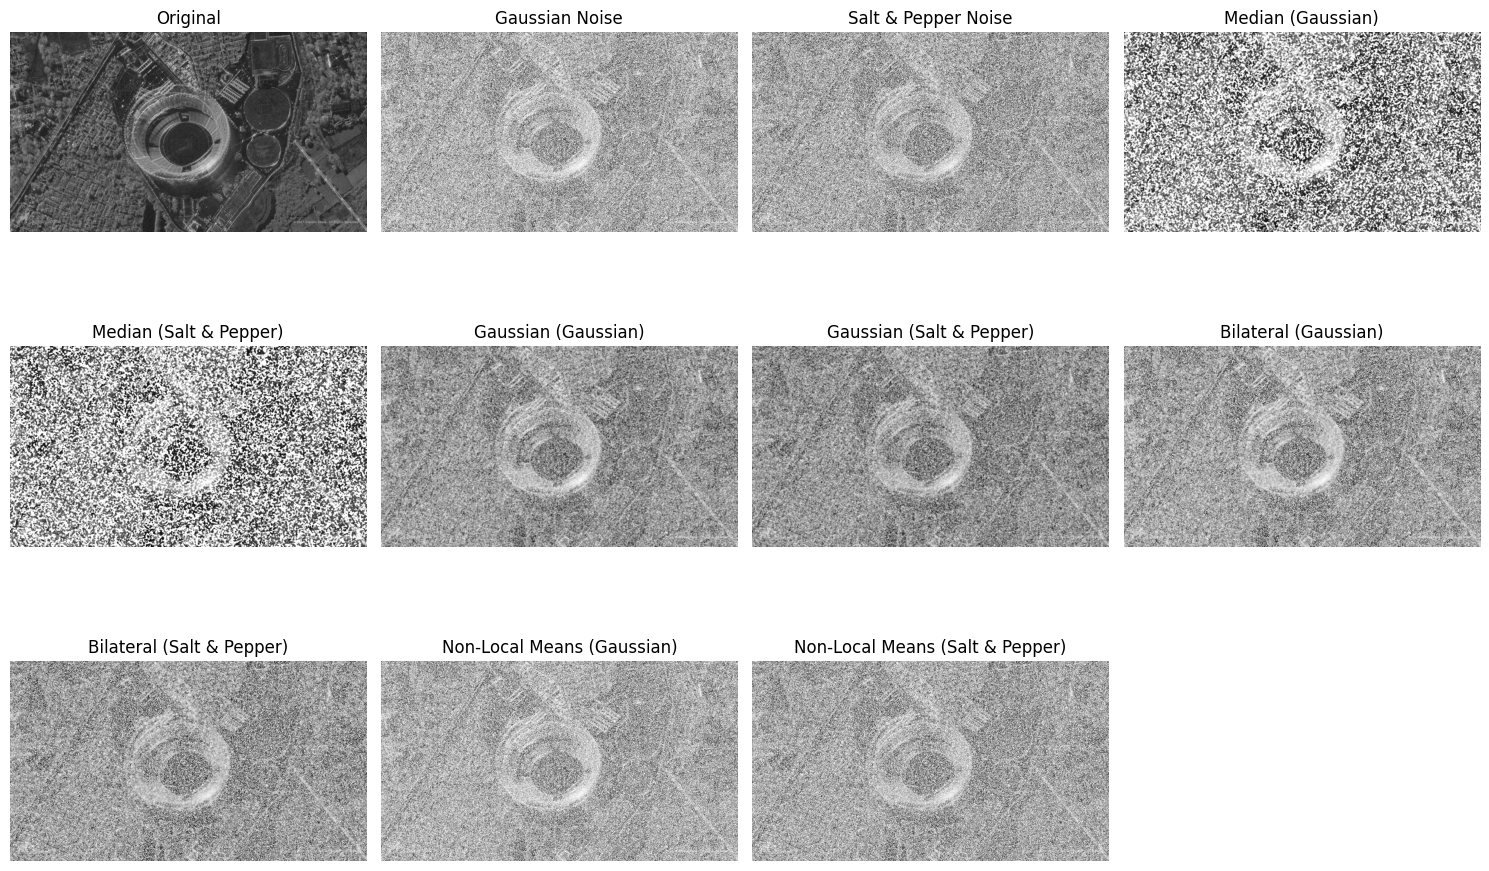

PSNR for Median Filter (Gaussian): 27.54283378008928
PSNR for Gaussian Filter (Gaussian): 27.85851268722457
PSNR for Bilateral Filter (Gaussian): 27.617107573571452
PSNR for Non-Local Means (Gaussian): 28.10291939067941
PSNR for Median Filter (Salt & Pepper): 28.085894165465316
PSNR for Gaussian Filter (Salt & Pepper): 27.785944547241588
PSNR for Bilateral Filter (Salt & Pepper): 28.28115717420581
PSNR for Non-Local Means (Salt & Pepper): 30.6220691708723


In [22]:
titles = ['Original', 'Gaussian Noise', 'Salt & Pepper Noise',
          'Median (Gaussian)', 'Median (Salt & Pepper)',
          'Gaussian (Gaussian)', 'Gaussian (Salt & Pepper)',
          'Bilateral (Gaussian)', 'Bilateral (Salt & Pepper)',
          'Non-Local Means (Gaussian)', 'Non-Local Means (Salt & Pepper)']
images = [img, img_gn, img_sp, mf_gn, mf_sp, gf_gn, gf_sp, bf_gn, bf_sp, nlm_gn, nlm_sp]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

print("PSNR for Median Filter (Gaussian):", psnr(img, mf_gn))
print("PSNR for Gaussian Filter (Gaussian):", psnr(img, gf_gn))
print("PSNR for Bilateral Filter (Gaussian):", psnr(img, bf_gn))
print("PSNR for Non-Local Means (Gaussian):", psnr(img, nlm_gn))

print("PSNR for Median Filter (Salt & Pepper):", psnr(img, mf_sp))
print("PSNR for Gaussian Filter (Salt & Pepper):", psnr(img, gf_sp))
print("PSNR for Bilateral Filter (Salt & Pepper):", psnr(img, bf_sp))
print("PSNR for Non-Local Means (Salt & Pepper):", psnr(img, nlm_sp))